In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92ea-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa930b-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92e4-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92f3-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92eb-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa9312-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa9308-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa9307-8d87-11e8-9daf-6045cb817f

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_images = datagen.flow_from_directory('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR',
                                          target_size=(64,64),
                                          class_mode='binary',
                                          subset='training')
val_images = datagen.flow_from_directory('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR',
                                          target_size=(64,64),
                                          class_mode='binary',
                                        subset='validation')

Found 72 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [107]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │       246,017 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,065 (969.00 KB)

 Trainable params: 247,937 (968.50 KB)

 Non-trainable params: 128 (512.00 B)

In [108]:
model.fit(train_images, 
          batch_size=32, 
          epochs=30, 
          validation_data=val_images)
model.save('DRcnnmodel_model.h5')

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 973ms/step - accuracy: 0.5097 - loss: 5.3559 - val_accuracy: 0.4375 - val_loss: 1.2089
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 509ms/step - accuracy: 0.7042 - loss: 5.1031 - val_accuracy: 0.5625 - val_loss: 0.8737
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 0.7736 - loss: 3.1027 - val_accuracy: 0.7500 - val_loss: 0.5698
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step - accuracy: 0.7834 - loss: 2.6075 - val_accuracy: 0.5625 - val_loss: 0.9502
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.7361 - loss: 1.5761 - val_accuracy: 0.5625 - val_loss: 0.8760
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step - accuracy: 0.8641 - loss: 0.9176 - val_accuracy: 0.8125 - val_loss: 0.4952
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 463ms/step - accuracy: 0.8494 - loss: 0.5548 - val_accuracy: 0.6875 - val_loss: 0.5229
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 465ms/step - accuracy: 0.8346 - loss: 0.6386 - val_accuracy: 0.6250 - val_loss:

In [110]:
y_true =val_images.classes

In [117]:
y_pred = model.predict(val_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


In [118]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [119]:
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)

0.75

In [120]:
metrics.confusion_matrix(y_true, y_pred)

array([[7, 2],
       [2, 5]])

In [121]:
print(metrics.classification_report(y_true, y_pred,
                                    target_names=['moderate DR', 'severe DR']))

              precision    recall  f1-score   support

 moderate DR       0.78      0.78      0.78         9
   severe DR       0.71      0.71      0.71         7

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16



In [122]:
val_images.class_indices

{'Moderate DR': 0, 'Severe DR': 1}

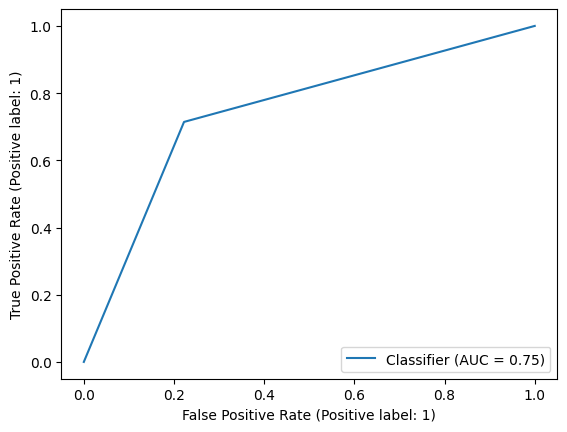

In [123]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)

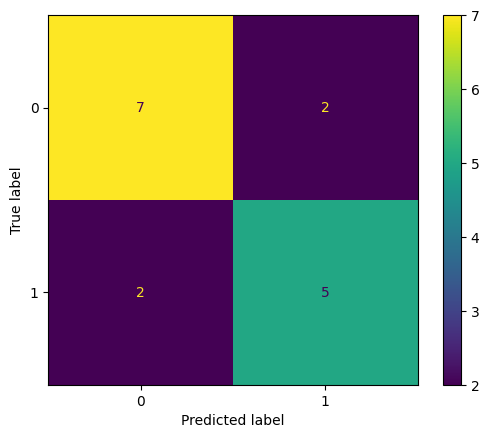

In [124]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [125]:
from keras.models import load_model
model = load_model('DRcnnmodel_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Moderat DR


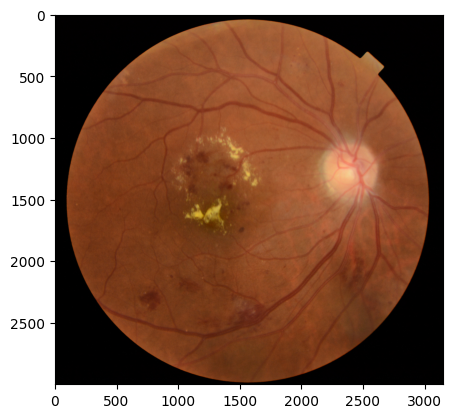

In [126]:
from keras.preprocessing import image
import numpy as np

img_path = "/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG"
img = image.load_img(img_path, target_size=(64,64))
image_array = image.img_to_array(img)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255

predictions = model.predict(image_array)
if predictions <=0.5:
    print('Moderat DR')
else:
    print('Severe DR')
    
import matplotlib.pyplot as plt
image1 = image.load_img('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Moderate DR/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(image1)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Severe DR


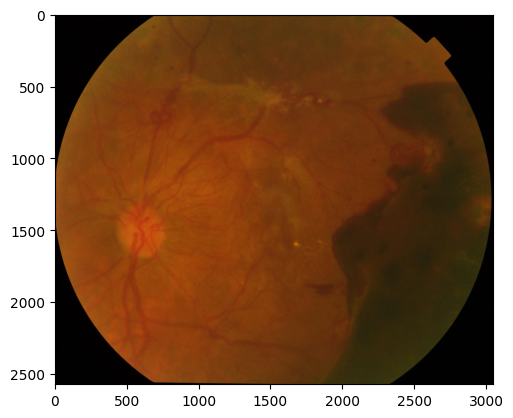

In [127]:
from keras.preprocessing import image
import numpy as np

img_path = "/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG"
img = image.load_img(img_path, target_size=(64,64))
image_array = image.img_to_array(img)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255

predictions = model.predict(image_array)
if predictions <=0.5:
    print('Moderat DR')
else:
    print('Severe DR')
    
import matplotlib.pyplot as plt
image1 = image.load_img('/kaggle/input/moderate-and-severe-dr-fundus-images/moderate and severe DR/Severe DR/1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(image1)

In [ ]:
thank you reliable model for deploying